In [27]:
%matplotlib notebook


from urllib.request import urlopen
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
import json
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.io as pio
import geopandas as gpd
import cbsodata as cbs
import seaborn as sns

In [36]:
data_motief = pd.DataFrame(cbs.get_data('84713NED'))
#data_motief.set_index('ID', inplace=True)
data_motief.head()

,ID,Populatie,Geslacht,Persoonskenmerken,Reismotieven,Marges,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,0,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,Nederland,2018,2.78,36.16,74.60,1015.0,13200.0,453.8
1,1,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,Nederland,2019,2.71,36.00,74.39,989.0,13140.0,452.6
2,2,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,Nederland,2020,2.35,24.88,61.96,861.0,9105.0,378.0
3,3,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,Nederland,2021,2.51,27.24,69.85,915.0,9942.0,424.9
4,4,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,Noord-Nederland (LD),2018,2.77,40.99,74.28,1011.0,14962.0,451.9


In [40]:
# jaar2021 = data_motief.groupby('Perioden').get_group('2021')
# #display(jaar2021)
# totaal_personen_2021 = jaar2021.groupby('Persoonskenmerken').get_group('Totaal personen')
# #display(totaal_personen_2021)
# tot_personen_2021_NL = totaal_personen_2021.groupby('RegioS').get_group('Nederland')
# #display(tot_personen_2021_NL)

In [54]:
# jaar18tot25_2021 = jaar2021.groupby('Persoonskenmerken').get_group('Leeftijd: 18 tot 25 jaar')
# #display(totaal_personen_2021)
# jaar18tot25_2021_NL = jaar18tot25_2021.groupby('RegioS').get_group('Nederland')
# display(jaar18tot25_2021_NL)

,ID,Populatie,Geslacht,Persoonskenmerken,Reismotieven,Marges,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
7923,7923,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Leeftijd: 18 tot 25 jaar,Totaal,Waarde,Nederland,2021,2.36,31.46,71.67,862.0,11482.0,436.0
8011,8011,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Leeftijd: 18 tot 25 jaar,Totaal,Ondergrens 95%-interval,Nederland,2021,2.31,29.95,69.32,841.0,10931.0,421.7
8099,8099,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Leeftijd: 18 tot 25 jaar,Totaal,Bovengrens 95%-interval,Nederland,2021,2.42,32.96,74.02,882.0,12032.0,450.3
8187,8187,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Leeftijd: 18 tot 25 jaar,Van en naar het werk,Waarde,Nederland,2021,0.49,6.60,11.96,177.0,2408.0,72.7
8275,8275,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Leeftijd: 18 tot 25 jaar,Van en naar het werk,Ondergrens 95%-interval,Nederland,2021,0.46,5.92,11.04,168.0,2160.0,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472123,472123,Populatie: 12 jaar of ouder,Vrouwen,Leeftijd: 18 tot 25 jaar,"Toeren, wandelen",Ondergrens 95%-interval,Nederland,2021,0.21,1.67,13.50,78.0,609.0,82.1
472211,472211,Populatie: 12 jaar of ouder,Vrouwen,Leeftijd: 18 tot 25 jaar,"Toeren, wandelen",Bovengrens 95%-interval,Nederland,2021,0.26,2.53,16.71,93.0,925.0,101.7
472299,472299,Populatie: 12 jaar of ouder,Vrouwen,Leeftijd: 18 tot 25 jaar,Overige reismotieven,Waarde,Nederland,2021,0.20,3.08,4.68,74.0,1126.0,28.5
472387,472387,Populatie: 12 jaar of ouder,Vrouwen,Leeftijd: 18 tot 25 jaar,Overige reismotieven,Ondergrens 95%-interval,Nederland,2021,0.18,2.36,3.92,65.0,861.0,23.8


In [53]:
#jaar18tot25_2021_NL.plot(x = 'Reismotieven', y= 'Verplaatsingen_1', kind = 'bar')

# data2 = jaar18tot25_2021_NL.groupby('Reismotieven')
# display(data2)

,Persoonskenmerken,Reismotieven,Verplaatsingen_1
44883,OV-Studentenkaart: weekabonnement,Totaal,2.34
44887,OV-Studentenkaart: weekabonnement,Totaal,2.42
44891,OV-Studentenkaart: weekabonnement,Totaal,2.37
44895,OV-Studentenkaart: weekabonnement,Totaal,2.28
44899,OV-Studentenkaart: weekabonnement,Totaal,2.42
...,...,...,...
514783,OV-Studentenkaart: geen,Overige reismotieven,0.34
514787,OV-Studentenkaart: geen,Overige reismotieven,0.39
514791,OV-Studentenkaart: geen,Overige reismotieven,0.40
514795,OV-Studentenkaart: geen,Overige reismotieven,0.40


<IPython.core.display.Javascript object>


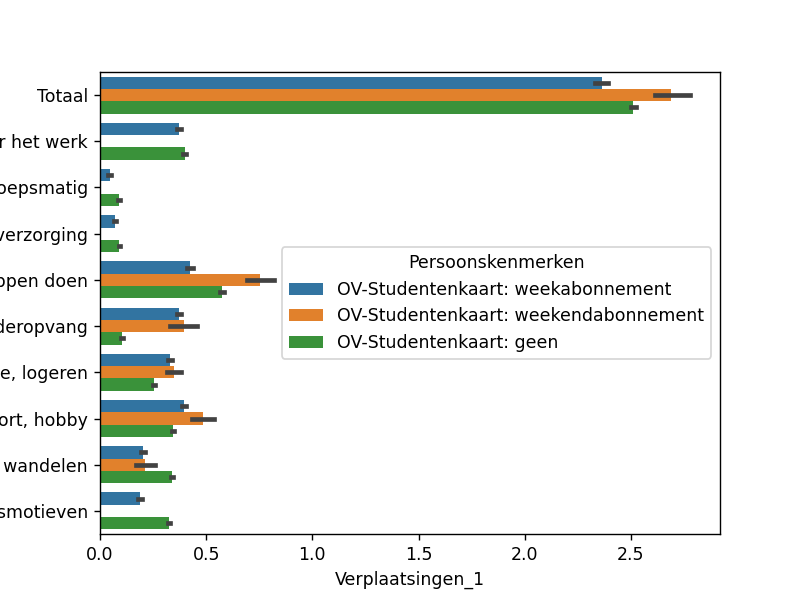

<AxesSubplot:xlabel='Verplaatsingen_1', ylabel='Reismotieven'>

In [60]:
# student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

# filtered_student_ov = jaar2021[jaar2021['Persoonskenmerken'].isin(student_ov)]
# columns = filtered_student_ov.columns
# #print(columns)
# drop1 = filtered_student_ov.drop(columns = ['ID','Populatie', 'Geslacht', 'Marges','RegioS', 'Perioden', 'Afstand_2', 'Reisduur_3', 'Verplaatsingen_4', 'Afstand_5', 'Reisduur_6'])
# display(drop1)
# # drop2 = drop1.drop(index)
# #drop1.plot(x = 'Reismotieven', y = 'Verplaatsingen_1', kind = 'bar')
# sns.barplot(x = 'Verplaatsingen_1', y = 'Reismotieven', hue = 'Persoonskenmerken', data = drop1)
# #sns.barplot(x='Periods', y='UseOfPublicTransport_2', data=filtered_student, hue ='PersonalCharacteristics')
# #plt.show(student)


In [44]:
# plt.figure(figsize=(9,6))
# student_ov = sns.barplot(x='Verplaatsingen_1', y='Reismotieven', data=filtered_student_ov, hue ='Persoonskenmerken')
# plt.show(student_ov)

In [ ]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = jaar2021[jaar2021['Persoonskenmerken'].isin(student_ov)]
columns = filtered_student_ov.columns
#print(columns)
drop1 = filtered_student_ov.drop(columns = ['ID','Populatie', 'Geslacht', 'Marges','RegioS', 'Perioden', 'Afstand_2', 'Reisduur_3', 'Verplaatsingen_4', 'Afstand_5', 'Reisduur_6'])
display(drop1)
# drop2 = drop1.drop(index)
#drop1.plot(x = 'Reismotieven', y = 'Verplaatsingen_1', kind = 'bar')
sns.barplot(x = 'Verplaatsingen_1', y = 'Reismotieven', hue = 'Persoonskenmerken', data = drop1)

In [63]:
# df = px.data.gapminder()

# df_new = df.groupby(['country', 'year']).sum().reset_index()

# df = px.data.gapminder()
# fig = px.bar(df, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken' , range_x = [0, 1600000000], height = 1000)

# fig.update_yaxes(categoryorder = 'total ascending')
# fig.update_traces(textposition="outside", showlegend = False)
# fig.update_layout(showlegend = False)

# fig.show()

In [65]:
data_motief_2 = data_motief.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
display(data_motief_2)

,Persoonskenmerken,Perioden,ID,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,Geen rijbewijs; jonger dan 17 jaar,2018,1275428880,1999.58,13554.20,45471.25,729814.0,4947213.0,276618.4
1,Geen rijbewijs; jonger dan 17 jaar,2019,1275432840,1791.79,12456.45,42200.87,654021.0,4546612.0,256723.7
2,Geen rijbewijs; jonger dan 17 jaar,2020,1275436800,1378.40,8128.69,33660.24,504479.0,2975033.0,205326.7
3,Geen rijbewijs; jonger dan 17 jaar,2021,1275440760,1544.05,9597.33,41046.21,563610.0,3502942.0,249693.7
4,Geen rijbewijs; wel 17 jaar of ouder,2018,1264974480,1378.94,13551.26,39817.94,503456.0,4946136.0,242223.8
...,...,...,...,...,...,...,...,...,...
135,"Rijbewijs, personenauto op eigen naam",2021,1233623160,2101.00,26135.24,57165.36,766830.0,9539478.0,347755.0
136,Totaal personen,2018,919979280,2178.51,29681.00,58537.77,795178.0,10833519.0,356107.6
137,Totaal personen,2019,919983240,2122.37,29648.81,58528.92,774631.0,10821836.0,356053.3
138,Totaal personen,2020,919987200,1855.68,20531.50,48779.18,679259.0,7514612.0,297556.2


In [73]:
fig = px.bar(data_motief_2, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
             orientation = 'h', text_auto = '.2s', animation_frame = 'Perioden', height = 1000)
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

In [68]:
data_motief_3 = data_motief.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
display(data_motief_3)

,Persoonskenmerken,Reismotieven,ID,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,Geen rijbewijs; jonger dan 17 jaar,"Diensten, persoonlijke verzorging",509546664,5.28,24.22,90.55,1936.0,8838.0,550.6
1,Geen rijbewijs; jonger dan 17 jaar,"Onderwijs volgen, cursus, kinderopvang",510383016,1238.43,6600.03,25675.91,452311.0,2410069.0,156269.7
2,Geen rijbewijs; jonger dan 17 jaar,Overige reismotieven,512055720,82.40,238.34,1279.62,30091.0,87047.0,7788.7
3,Geen rijbewijs; jonger dan 17 jaar,"Toeren, wandelen",511637544,68.30,353.06,4059.52,24963.0,128976.0,24713.0
4,Geen rijbewijs; jonger dan 17 jaar,Totaal,508292136,3892.43,27809.91,95424.64,1421585.0,10155940.0,580841.0
...,...,...,...,...,...,...,...,...,...
345,Totaal personen,"Uitgaan, sport, hobby",369039528,653.90,8403.27,19879.68,238821.0,3068831.0,121004.5
346,Totaal personen,Van en naar het werk,366530472,743.90,13878.92,20434.44,271692.0,5068436.0,124377.3
347,Totaal personen,"Visite, logeren",368621352,417.36,8549.04,11824.02,152419.0,3121968.0,71972.0
348,Totaal personen,"Winkelen, boodschappen doen",367785000,894.46,4877.65,12690.57,326659.0,1781450.0,77247.8


In [69]:
fig = px.bar(data_motief_3, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Reismotieven',
             orientation = 'h', text_auto = '.2s', animation_frame = 'Persoonskenmerken')
fig.update_traces(textposition="outside")
fig.show()

In [75]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief_3[data_motief_3['Persoonskenmerken'].isin(student_ov)]
data_motief_4 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
display(data_motief_4)

,Persoonskenmerken,Reismotieven,ID,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,OV-Studentenkaart: geen,"Diensten, persoonlijke verzorging",446820264,115.09,979.34,2161.96,42033.0,357654.0,13159.5
1,OV-Studentenkaart: geen,"Onderwijs volgen, cursus, kinderopvang",447656616,190.71,1384.79,4188.61,69594.0,505614.0,25493.7
2,OV-Studentenkaart: geen,Overige reismotieven,449329320,495.65,4615.28,8391.24,181039.0,1685631.0,51077.3
3,OV-Studentenkaart: geen,"Toeren, wandelen",448911144,394.62,3353.15,24781.45,144169.0,1224806.0,150867.1
4,OV-Studentenkaart: geen,Totaal,445565736,4091.63,51529.34,110260.75,1494411.0,18818661.0,671163.1
5,OV-Studentenkaart: geen,"Uitgaan, sport, hobby",448492968,647.82,8333.12,19669.46,236526.0,3043178.0,119724.8
6,OV-Studentenkaart: geen,Van en naar het werk,445983912,750.29,14209.63,20693.55,273948.0,5189131.0,125952.3
7,OV-Studentenkaart: geen,"Visite, logeren",448074792,414.05,8408.75,11573.62,151188.0,3070747.0,70444.1
8,OV-Studentenkaart: geen,"Winkelen, boodschappen doen",447238440,907.87,4939.71,12827.01,331589.0,1804053.0,78081.1
9,OV-Studentenkaart: geen,"Zakelijk, beroepsmatig",446402088,121.67,3471.33,4275.63,44502.0,1267734.0,26026.6


In [91]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]

#display(filtered_student_ov)


data_motief_5 = data_motief.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
display(data_motief_5)
# data_motief_5 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
fig = px.bar(data_motief_5, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Reismotieven')
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

,Persoonskenmerken,Reismotieven,ID,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,Geen rijbewijs; jonger dan 17 jaar,"Diensten, persoonlijke verzorging",509546664,5.28,24.22,90.55,1936.0,8838.0,550.6
1,Geen rijbewijs; jonger dan 17 jaar,"Onderwijs volgen, cursus, kinderopvang",510383016,1238.43,6600.03,25675.91,452311.0,2410069.0,156269.7
2,Geen rijbewijs; jonger dan 17 jaar,Overige reismotieven,512055720,82.40,238.34,1279.62,30091.0,87047.0,7788.7
3,Geen rijbewijs; jonger dan 17 jaar,"Toeren, wandelen",511637544,68.30,353.06,4059.52,24963.0,128976.0,24713.0
4,Geen rijbewijs; jonger dan 17 jaar,Totaal,508292136,3892.43,27809.91,95424.64,1421585.0,10155940.0,580841.0
...,...,...,...,...,...,...,...,...,...
345,Totaal personen,"Uitgaan, sport, hobby",369039528,653.90,8403.27,19879.68,238821.0,3068831.0,121004.5
346,Totaal personen,Van en naar het werk,366530472,743.90,13878.92,20434.44,271692.0,5068436.0,124377.3
347,Totaal personen,"Visite, logeren",368621352,417.36,8549.04,11824.02,152419.0,3121968.0,71972.0
348,Totaal personen,"Winkelen, boodschappen doen",367785000,894.46,4877.65,12690.57,326659.0,1781450.0,77247.8


In [95]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]

#display(filtered_student_ov)


data_motief_6 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
display(data_motief_6)
# data_motief_5 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
fig = px.bar(data_motief_6, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Perioden')
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

,Persoonskenmerken,Perioden,ID,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
0,OV-Studentenkaart: geen,2018,1118612880,2175.46,29229.53,57731.62,794010.0,10668736.0,351201.7
1,OV-Studentenkaart: geen,2019,1118616840,2120.57,29172.15,57774.25,773908.0,10647771.0,351463.2
2,OV-Studentenkaart: geen,2020,1118620800,1859.26,20412.61,48699.75,680454.0,7471024.0,297068.7
3,OV-Studentenkaart: geen,2021,1118624760,1974.11,22410.15,54617.66,720627.0,8179678.0,332256.0
4,OV-Studentenkaart: weekabonnement,2018,1097704080,1542.14,26079.84,53211.64,562876.0,9519118.0,323704.4
5,OV-Studentenkaart: weekabonnement,2019,1097708040,1349.82,23042.52,47392.88,492642.0,8410540.0,288307.4
6,OV-Studentenkaart: weekabonnement,2020,1097712000,1049.02,12146.24,30025.42,383880.0,4445546.0,183154.2
7,OV-Studentenkaart: weekabonnement,2021,1097715960,1254.24,16324.84,41737.54,457824.0,5958528.0,253902.8
8,OV-Studentenkaart: weekendabonnement,2018,1108158480,322.92,2901.42,7879.24,117850.0,1059022.0,47933.4
9,OV-Studentenkaart: weekendabonnement,2019,1108162440,255.44,2087.58,6090.46,93226.0,761964.0,37049.8


In [107]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]

#display(filtered_student_ov)


data_motief_6 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
#display(data_motief_6)
data_motief_5 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
fig = px.bar(data_motief_6, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Reismotieven',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Persoonskenmerken')
fig.update_layout(showlegend = False)
fig.show()

In [122]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]

#display(filtered_student_ov)


data_motief_7 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
fig = px.bar(data_motief_7, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', barmode = 'group')
fig.update_traces(textposition="outside")
fig.update_yaxes(categoryorder = 'total ascending')
#fig.update_layout(showlegend = False)
fig.show()

In [119]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]

#display(filtered_student_ov)


data_motief_8 = filtered_student_ov.groupby(['Reismotieven','Persoonskenmerken']).sum()
# display(data_motief_8)
# fig = px.bar(data_motief_8, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken',
#               orientation = 'h', text_auto = '.2s', barmode = 'group')
# fig.update_traces(textposition="outside")
# fig.update_traces(textposition="outside")
# #fig.update_layout(showlegend = False)
# fig.show()

ID  \
Reismotieven                           Persoonskenmerken                                 
Diensten, persoonlijke verzorging      OV-Studentenkaart: geen               446820264   
                                       OV-Studentenkaart: weekabonnement     438456744   
                                       OV-Studentenkaart: weekendabonnement  442638504   
Onderwijs volgen, cursus, kinderopvang OV-Studentenkaart: geen               447656616   
                                       OV-Studentenkaart: weekabonnement     439293096   
                                       OV-Studentenkaart: weekendabonnement  443474856   
Overige reismotieven                   OV-Studentenkaart: geen               449329320   
                                       OV-Studentenkaart: weekabonnement     440965800   
                                       OV-Studentenkaart: weekendabonnement  445147560   
Toeren, wandelen                       OV-Studentenkaart: geen               448911144   
                                       OV-Studentenkaart: weekabonnement     440547624   
                                       OV-Studentenkaart: weekendabonnement  444729384   
Totaal                                 OV-Studentenkaart: geen               445565736   
                                       OV-Studentenkaart: weekabonnement     437202216   
                                       OV-Studentenkaart: weekendabonnement  441383976   
Uitgaan, sport, hobby                  OV-Studentenkaart: geen               448492968   
                                       OV-Studentenkaart: weekabonnement     440129448   
                                       OV-Studentenkaart: weekendabonnement  444311208   
Van en naar het werk                   OV-Studentenkaart: geen               445983912   
                                       OV-Studentenkaart: weekabonnement     437620392   
                                       OV-Studentenkaart: weekendabonnement  441802152   
Visite, logeren                        OV-Studentenkaart: geen               448074792   
                                       OV-Studentenkaart: weekabonnement     439711272   
                                       OV-Studentenkaart: weekendabonnement  443893032   
Winkelen, boodschappen doen            OV-Studentenkaart: geen               447238440   
                                       OV-Studentenkaart: weekabonnement     438874920   
                                       OV-Studentenkaart: weekendabonnement  443056680   
Zakelijk, beroepsmatig                 OV-Studentenkaart: geen               446402088   
                                       OV-Studentenkaart: weekabonnement     438038568   
                                       OV-Studentenkaart: weekendabonnement  442220328   

                                                                             Verplaatsingen_1  \
Reismotieven                           Persoonskenmerken                                        
Diensten, persoonlijke verzorging      OV-Studentenkaart: geen                         115.09   
                                       OV-Studentenkaart: weekabonnement                 4.38   
                                       OV-Studentenkaart: weekendabonnement              0.00   
Onderwijs volgen, cursus, kinderopvang OV-Studentenkaart: geen                         190.71   
                                       OV-Studentenkaart: weekabonnement               479.86   
                                       OV-Studentenkaart: weekendabonnement             52.86   
Overige reismotieven                   OV-Studentenkaart: geen                         495.65   
                                       OV-Studentenkaart: weekabonnement                73.82   
                                       OV-Studentenkaart: weekendabonnement              1.68   
Toeren, wandelen                       OV-Studentenkaart: geen                         394.62   
                                       

In [124]:
data_motief['Persoonskenmerken'].unique()

auto = [ 'Rijbewijs, personenauto op eigen naam', 'Rijbewijs, personenauto in hh', 'Rijbewijs, geen personenauto in hh',
       'Geen rijbewijs; wel 17 jaar of ouder','Geen rijbewijs; jonger dan 17 jaar']

filtered_auto = data_motief[data_motief['Persoonskenmerken'].isin(auto)]

#display(filtered_student_ov)


data_motief_8 = filtered_auto.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
fig = px.bar(data_motief_8, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', barmode = 'group')
fig.update_traces(textposition="outside")
fig.update_yaxes(categoryorder = 'total ascending')
#fig.update_layout(showlegend = False)
fig.show()